# 🔍 Optimization Template – PuLP (Maximization & Minimization)

This notebook uses `PuLP`, a Python library for linear programming, to solve optimization problems.  
You can copy this template for each new scenario by updating:

- The **problem description**
- The **objective function**
- The **constraints**

---

## 🗂️ Table of Contents

- [🚀 Maximization Model](#part-1-maximization--profit)
- [📊 Sensitivity Analysis](#sensitivity-analysis-results)
- [🔻 Minimization Model](#part-2-minimization--cost)
- [🎛️ Scenario Selector](#scenario-selector)
- [📦 Shipment Chart](#visual-optimal-shipments-chart)
- [🔄 What-If Testing](#what-if-scenario-testing)


## Part 1: Maximization - Profit

### 📘 Problem Statement Example: Maximize Profit for 2 Products

A company makes Product A and Product B.  
- Product A uses 2 hours of Machine 1 and 1 hour of Machine 2  
- Product B uses 1 hour of Machine 1 and 3 hours of Machine 2  
- Machine 1 has 100 hours, Machine 2 has 90 hours  
- Profit: $40 for A, $50 for B  

**Objective**: Maximize profit.

---

### ✏️ Algebraic Formulation:

Let:  
- `x1` = units of Product A  
- `x2` = units of Product B

**Maximize:** `Z = 40x1 + 50x2`  
**Subject to:**  
- `2x1 + 1x2 ≤ 100`  
- `1x1 + 3x2 ≤ 90`  
- `x1, x2 ≥ 0`


In [10]:
import pandas as pd

# Visual representation of LP setup
df = pd.DataFrame({
    "Variable": ["x1 (Product A)", "x2 (Product B)"],
    "Profit Coef": [40, 50],
    "Machine 1 hrs/unit": [2, 1],
    "Machine 2 hrs/unit": [1, 3],
    "Lower Bound": [0, 0],
    "Upper Bound": [float('inf'), float('inf')]
})

display(df)

# Constraint summary
rhs = pd.DataFrame({
    "Constraint": ["Machine 1 Capacity", "Machine 2 Capacity"],
    "Equation (LHS)": ["2x1 + 1x2", "1x1 + 3x2"],
    "Sense": ["≤", "≤"],
    "RHS Value": [100, 90]
})

display(rhs)


,Variable,Profit Coef,Machine 1 hrs/unit,Machine 2 hrs/unit,Lower Bound,Upper Bound
0,x1 (Product A),40,2,1,0,inf
1,x2 (Product B),50,1,3,0,inf


,Constraint,Equation (LHS),Sense,RHS Value
0,Machine 1 Capacity,2x1 + 1x2,≤,100
1,Machine 2 Capacity,1x1 + 3x2,≤,90


In [11]:
import pulp as pl

# Define the model
model = pl.LpProblem("Maximize_Profit", pl.LpMaximize)

# Decision variables
x1 = pl.LpVariable("x1_ProductA", lowBound=0)
x2 = pl.LpVariable("x2_ProductB", lowBound=0)

# Objective function
model += 40 * x1 + 50 * x2, "Total_Profit"

# Constraints
model += 2 * x1 + 1 * x2 <= 100, "Machine_1_Capacity"
model += 1 * x1 + 3 * x2 <= 90, "Machine_2_Capacity"

# Solve
model.solve()

# Output
print("📈 Optimization Status:", pl.LpStatus[model.status])
print(f"💰 Maximum Profit: ${pl.value(model.objective):,.2f}")
print(f"🔹 Optimal production quantity for Product A (x1): {x1.varValue:.0f} units")
print(f"🔹 Optimal production quantity for Product B (x2): {x2.varValue:.0f} units")


Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/anaconda3/envs/aiopt/lib/python3.10/site-packages/pulp/apis/../solverdir/cbc/osx/i64/cbc /var/folders/pl/w3z83xs50653rdq_0shjtkyh0000gn/T/56b7c3f133b64b75acfdac475283420d-pulp.mps -max -timeMode elapsed -branch -printingOptions all -solution /var/folders/pl/w3z83xs50653rdq_0shjtkyh0000gn/T/56b7c3f133b64b75acfdac475283420d-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 7 COLUMNS
At line 14 RHS
At line 17 BOUNDS
At line 18 ENDATA
Problem MODEL has 2 rows, 2 columns and 4 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 2 (0) rows, 2 (0) columns and 4 (0) elements
0  Obj -0 Dual inf 90 (2)
0  Obj -0 Dual inf 90 (2)
2  Obj 2480
Optimal - objective value 2480
Optimal objective 2480 - 2 iterations time 0.002
Option for printingOptions changed from normal to all
Total time (CPU seconds):       0.00   (Wallclock s

## Sensitivity Analysis Results

In [12]:
print("\n📊 Constraint Sensitivity:")
for name, constraint in model.constraints.items():
    print(f"{name}:")
    print(f"  Slack = {constraint.slack:.2f}")
    print(f"  Shadow Price (Dual) = {constraint.pi:.2f}")



📊 Constraint Sensitivity:
Machine_1_Capacity:
  Slack = -0.00
  Shadow Price (Dual) = 14.00
Machine_2_Capacity:
  Slack = -0.00
  Shadow Price (Dual) = 12.00


## What-If Scenario Testing

## 🔄 What-If Scenario Testing

This section explores how changes to the model parameters (profits, constraints, bounds) affect the optimal solution.

| Scenario                        | x1 (A) | x2 (B) | Total Profit | Notes |
|---------------------------------|--------|--------|---------------|-------|
| ✅ Base Case                    |        |        |               | Starting reference model |
| 💲 Product A profit = $35       |        |        |               | Lower incentive for A |
| 🕒 Machine 1 capacity = 110     |        |        |               | More machine time available |
| 📉 Max 30 units of A            |        |        |               | Simulates supply constraint |
| ⚖️ Min 10 units of B           |        |        |               | Forces a policy-driven output |


## Part 2: Minimization - Cost

## 🔻 Minimization Example – Shipping Cost Optimization

A company needs to ship goods from two warehouses to two retail stores.  
Each route has a cost per unit, and each location has constraints:

- **Warehouses:**
  - W1 can ship up to 70 units
  - W2 can ship up to 80 units

- **Stores:**
  - S1 requires 50 units
  - S2 requires 100 units

- **Shipping costs per unit:**
  - W1 → S1: $4
  - W1 → S2: $6
  - W2 → S1: $5
  - W2 → S2: $3

### 🎯 Objective:
Minimize the total shipping cost while meeting demand and not exceeding supply.

---

### 🧮 Algebraic Formulation

Let:
- `x11` = units shipped from W1 to S1  
- `x12` = units shipped from W1 to S2  
- `x21` = units shipped from W2 to S1  
- `x22` = units shipped from W2 to S2

**Minimize:**  
`Z = 4x11 + 6x12 + 5x21 + 3x22`

**Subject to:**  
- `x11 + x12 ≤ 70` (W1 capacity)  
- `x21 + x22 ≤ 80` (W2 capacity)  
- `x11 + x21 ≥


In [13]:
import pulp as pl

# Define the model
min_model = pl.LpProblem("Minimize_Shipping_Cost", pl.LpMinimize)

# Decision variables
x11 = pl.LpVariable("x11_W1_to_S1", lowBound=0)
x12 = pl.LpVariable("x12_W1_to_S2", lowBound=0)
x21 = pl.LpVariable("x21_W2_to_S1", lowBound=0)
x22 = pl.LpVariable("x22_W2_to_S2", lowBound=0)

# Objective function
min_model += 4*x11 + 6*x12 + 5*x21 + 3*x22, "Total_Shipping_Cost"

# Supply constraints
min_model += x11 + x12 <= 70, "W1_Supply"
min_model += x21 + x22 <= 80, "W2_Supply"

# Demand constraints
min_model += x11 + x21 >= 50, "S1_Demand"
min_model += x12 + x22 >= 100, "S2_Demand"

# Solve
min_model.solve()

# Output
print("📉 Optimization Status:", pl.LpStatus[min_model.status])
print(f"🧾 Minimum Cost: ${pl.value(min_model.objective):,.2f}")
print(f"x11 (W1 → S1): {x11.varValue:.0f} units")
print(f"x12 (W1 → S2): {x12.varValue:.0f} units")
print(f"x21 (W2 → S1): {x21.varValue:.0f} units")
print(f"x22 (W2 → S2): {x22.varValue:.0f} units")


Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/anaconda3/envs/aiopt/lib/python3.10/site-packages/pulp/apis/../solverdir/cbc/osx/i64/cbc /var/folders/pl/w3z83xs50653rdq_0shjtkyh0000gn/T/14cf4736c3ce4b1e9ab265c931c9cea0-pulp.mps -timeMode elapsed -branch -printingOptions all -solution /var/folders/pl/w3z83xs50653rdq_0shjtkyh0000gn/T/14cf4736c3ce4b1e9ab265c931c9cea0-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 9 COLUMNS
At line 22 RHS
At line 27 BOUNDS
At line 28 ENDATA
Problem MODEL has 4 rows, 4 columns and 8 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 4 (0) rows, 4 (0) columns and 8 (0) elements
0  Obj 0 Primal inf 150 (2)
3  Obj 560
Optimal - objective value 560
Optimal objective 560 - 3 iterations time 0.002
Option for printingOptions changed from normal to all
Total time (CPU seconds):       0.00   (Wallclock seconds):       0.00

📉 Optimizat

In [14]:
import pandas as pd

# Decision variable summary
shipping_table = pd.DataFrame({
    "Route": ["W1 → S1", "W1 → S2", "W2 → S1", "W2 → S2"],
    "Variable": ["x11", "x12", "x21", "x22"],
    "Cost per Unit": [4, 6, 5, 3],
    "Lower Bound": [0, 0, 0, 0],
    "Upper Bound": [float('inf'), float('inf'), float('inf'), float('inf')]
})

display(shipping_table)

# Constraint summary
constraints_table = pd.DataFrame({
    "Constraint": ["W1 Supply", "W2 Supply", "S1 Demand", "S2 Demand"],
    "Equation (LHS)": [
        "x11 + x12",
        "x21 + x22",
        "x11 + x21",
        "x12 + x22"
    ],
    "Sense": ["≤", "≤", "≥", "≥"],
    "RHS Value": [70, 80, 50, 100]
})

display(constraints_table)


,Route,Variable,Cost per Unit,Lower Bound,Upper Bound
0,W1 → S1,x11,4,0,inf
1,W1 → S2,x12,6,0,inf
2,W2 → S1,x21,5,0,inf
3,W2 → S2,x22,3,0,inf


,Constraint,Equation (LHS),Sense,RHS Value
0,W1 Supply,x11 + x12,≤,70
1,W2 Supply,x21 + x22,≤,80
2,S1 Demand,x11 + x21,≥,50
3,S2 Demand,x12 + x22,≥,100


## Scenario Selector

In [15]:
!pip install ipywidgets

## 🎛️ Interactive Scenario Selector

Use the dropdown menu below to select a supply chain scenario.  
The model will adjust supply, demand, or cost inputs based on your selection.

You can re-run the dropdown at any time to test different "what-if" cases.

**Scenarios included:**
- Base case with original supply/costs
- Increased supply at Warehouse 1
- Higher shipping cost from W2 → S1
- Increased demand at Store 2


In [16]:
import ipywidgets as widgets
from IPython.display import display

# Define dropdown options
scenario_dropdown = widgets.Dropdown(
    options=[
        ("Base Case", "base"),
        ("More supply at W1 (90 units)", "more_w1"),
        ("Higher cost W2 → S1 ($8)", "cost_up_w21"),
        ("New demand at S2 (120 units)", "more_demand_s2")
    ],
    description="Scenario:"
)

display(scenario_dropdown)


Dropdown(description='Scenario:', options=(('Base Case', 'base'), ('More supply at W1 (90 units)', 'more_w1'),…

In [17]:
def run_shipping_scenario(scenario_code):
    # Setup the model
    model = pl.LpProblem("ShippingCostMinimization", pl.LpMinimize)

    # Base parameters
    supply_w1 = 70
    supply_w2 = 80
    demand_s1 = 50
    demand_s2 = 100
    cost_x11 = 4
    cost_x12 = 6
    cost_x21 = 5
    cost_x22 = 3

    # Apply scenario overrides
    if scenario_code == "more_w1":
        supply_w1 = 90
    elif scenario_code == "cost_up_w21":
        cost_x21 = 8
    elif scenario_code == "more_demand_s2":
        demand_s2 = 120

    # Define decision variables
    x11 = pl.LpVariable("x11_W1_S1", lowBound=0)
    x12 = pl.LpVariable("x12_W1_S2", lowBound=0)
    x21 = pl.LpVariable("x21_W2_S1", lowBound=0)
    x22 = pl.LpVariable("x22_W2_S2", lowBound=0)

    # Objective function
    model += (
        cost_x11 * x11 +
        cost_x12 * x12 +
        cost_x21 * x21 +
        cost_x22 * x22,
        "Total_Cost"
    )

    # Constraints
    model += x11 + x12 <= supply_w1, "Supply_W1"
    model += x21 + x22 <= supply_w2, "Supply_W2"
    model += x11 + x21 >= demand_s1, "Demand_S1"
    model += x12 + x22 >= demand_s2, "Demand_S2"

    # Solve
    model.solve()

    # Output
    print(f"\n📘 Scenario: {scenario_code}")
    print("Status:", pl.LpStatus[model.status])
    print(f"Total Cost = ${pl.value(model.objective):,.2f}")
    print(f"x11 (W1 → S1): {x11.varValue:.0f} units")
    print(f"x12 (W1 → S2): {x12.varValue:.0f} units")
    print(f"x21 (W2 → S1): {x21.varValue:.0f} units")
    print(f"x22 (W2 → S2): {x22.varValue:.0f} units")

 # Optional Chart
    routes = ["W1 → S1", "W1 → S2", "W2 → S1", "W2 → S2"]
    quantities = [x11.varValue, x12.varValue, x21.varValue, x22.varValue]

    plt.figure(figsize=(6, 4))
    plt.bar(routes, quantities, color="teal")
    plt.title("📦 Optimal Units Shipped per Route")
    plt.ylabel("Units")
    plt.xlabel("Route")
    plt.ylim(0, max(quantities) + 10)
    plt.grid(axis="y", linestyle="--", alpha=0.5)
    plt.show()

## Visual: Optimal Shipments Chart

In [18]:
### if not run prior... add import pulp as pl

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/anaconda3/envs/aiopt/lib/python3.10/site-packages/pulp/apis/../solverdir/cbc/osx/i64/cbc /var/folders/pl/w3z83xs50653rdq_0shjtkyh0000gn/T/3c14eef6f282464bb1abeb7e801c3c01-pulp.mps -timeMode elapsed -branch -printingOptions all -solution /var/folders/pl/w3z83xs50653rdq_0shjtkyh0000gn/T/3c14eef6f282464bb1abeb7e801c3c01-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 9 COLUMNS
At line 22 RHS
At line 27 BOUNDS
At line 28 ENDATA
Problem MODEL has 4 rows, 4 columns and 8 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 4 (0) rows, 4 (0) columns and 8 (0) elements
0  Obj 0 Primal inf 150 (2)
3  Obj 560
Optimal - objective value 560
Optimal objective 560 - 3 iterations time 0.002
Option for printingOptions changed from normal to all
Total time (CPU seconds):       0.00   (Wallclock seconds):       0.00


📘 Scenario

/opt/anaconda3/envs/aiopt/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


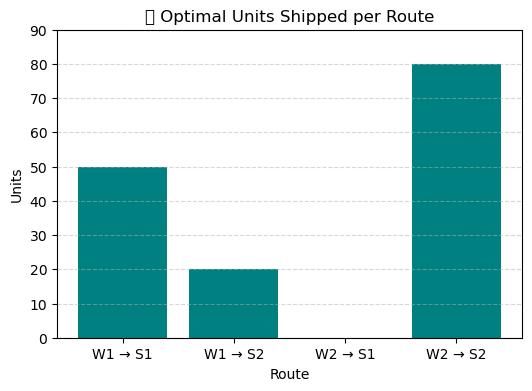

In [19]:
# Run the scenario selected in the dropdown
run_shipping_scenario(scenario_dropdown.value)

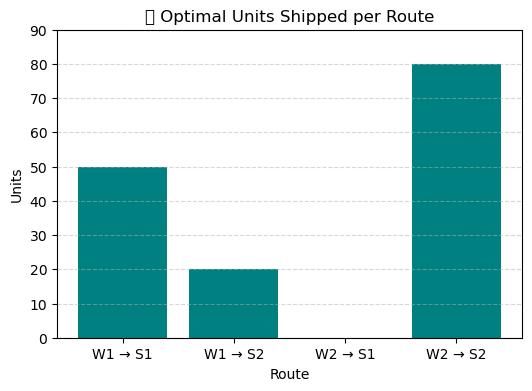

In [20]:
import matplotlib.pyplot as plt

routes = ["W1 → S1", "W1 → S2", "W2 → S1", "W2 → S2"]
quantities = [x11.varValue, x12.varValue, x21.varValue, x22.varValue]

plt.figure(figsize=(6,4))
plt.bar(routes, quantities, color="teal")
plt.title("📦 Optimal Units Shipped per Route")
plt.ylabel("Units")
plt.xlabel("Route")
plt.ylim(0, max(quantities) + 10)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()
